# Credit Borrower Case Analysis

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image
import warnings
warnings.simplefilter("ignore", UserWarning)
import seaborn as sns

portfolio = pd.read_csv(r'C:\Aravindh/DPD.csv')
portfolio

C:\Users\conte\AppData\Local\Temp\ipykernel_24344\221296281.py:13: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



Template_ID                 Due_Date  Campaign_ID   Channel  \
0           Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
1           Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
2           Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
3           Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
4           Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
...               ...                      ...          ...       ...   
169468  Bounced Cases  2022-11-13 00:00:00 UTC  172503474.0       SMS   
169469  Bounced Cases  2022-11-13 00:00:00 UTC  172503474.0       SMS   
169470  Bounced Cases  2022-11-13 00:00:00 UTC  172503474.0       SMS   
169471  Bounced Cases  2022-11-13 00:00:00 UTC  172503474.0       SMS   
169472  Bounced Cases  2022-11-13 00:00:00 UTC  172503474.0       SMS   

       Communication_Operator_Message_ID                   Updated_At  \
0              4785461239170387979-NnUFJ  2022-12-02 14:49:25.123 UTC   
1              4785462264095129611-NmkbX    2022-12-02 12:37:56.3 UTC   
2              4785462271627915557-w4o5s    2022-12-02 12:48:33.3 UTC   
3              4785462273777979461-nzuZu  2022-12-02 12:15:11.356 UTC   
4              4785462294871265547-fCoFg  2022-12-02 12:19:06.166 UTC   
...                                  ...                          ...   
169468          326c676a4262393130383037  2022-12-07 04:58:10.796 UTC   
169469          326c676a4262313733353537  2022-12-07 04:58:09.944 UTC   
169470          326c676a4264333339303737  2022-12-07 04:58:11.083 UTC   
169471          326c676a4264303231303031  2022-12-07 04:58:25.116 UTC   
169472          326c676a4b65383437333036  2022-12-07 05:13:12.585 UTC   

        Amount_Pending               Status Communication_Operator_Status  \
0               6680.0                 READ                           NaN   
1               7824.0                 READ                           NaN   
2               7626.0                 READ                           NaN   
3               6482.0                 READ                           NaN   
4               5952.0                 READ                           NaN   
...                ...                  ...                           ...   
169468          3437.0  OPENED_PAYMENT_LINK                           NaN   
169469          1791.0  OPENED_PAYMENT_LINK                           NaN   
169470          1791.0  OPENED_PAYMENT_LINK                           NaN   
169471          1791.0  OPENED_PAYMENT_LINK                           NaN   
169472          1353.0  OPENED_PAYMENT_LINK                           NaN   

                         Created_At  ...  Salary_day               DOB  \
0       2022-12-02 12:11:02.221 UTC  ...        18.0  29-03-1989 00:00   
1       2022-12-02 12:13:04.375 UTC  ...        20.0  10-04-1997 00:00   
2       2022-12-02 12:13:05.267 UTC  ...        31.0  23-06-1988 00:00   
3       2022-12-02 12:13:05.528 UTC  ...        31.0  03-05-1996 00:00   
4       2022-12-02 12:13:08.026 UTC  ...        19.0  07-09-1984 00:00   
...                             ...  ...         ...               ...   
169468  2022-12-07 04:58:02.556 UTC  ...        31.0  10-06-1993 00:00   
169469  2022-12-07 04:58:02.768 UTC  ...         NaN  02-12-2001 00:00   
169470  2022-12-07 04:58:04.049 UTC  ...        31.0  07-06-1998 00:00   
169471   2022-12-07 04:58:04.84 UTC  ...        31.0  04-04-1997 00:00   
169472  2022-12-07 05:07:05.043 UTC  ...        31.0  04-03-2003 00:00   

       Loan_Amount Last_Repayment_Date  EMIs_Pending Interest  \
0          50000.0          2022-11-30           NaN  1124.44   
1          42000.0          2022-11-18           6.0  1008.00   
2          40000.0          2022-11-23           6.0   959.33   
3          34000.0          2022-11-01           6.0   815.33   
4          32000.0          2022-11-19           6.0   767.67   
...            ...                 ...           ...

In [42]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169473 entries, 0 to 169472
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Template_ID                        169105 non-null  object 
 1   Due_Date                           169473 non-null  object 
 2   Campaign_ID                        168886 non-null  float64
 3   Channel                            169473 non-null  object 
 4   Communication_Operator_Message_ID  113732 non-null  object 
 5   Updated_At                         169473 non-null  object 
 6   Amount_Pending                     169473 non-null  float64
 7   Status                             169473 non-null  object 
 8   Communication_Operator_Status      70591 non-null   object 
 9   Created_At                         169473 non-null  object 
 10  Amount_pending_1                   169473 non-null  int64  
 11  Due_Date_1                         1694

In [43]:
portfolio.describe()

Campaign_ID  Amount_Pending  Amount_pending_1    CIBIL_Score  \
count  1.688860e+05   169473.000000     169473.000000  169473.000000   
mean   1.682766e+08     2412.010869       1675.021006     633.984074   
std    2.718695e+06     1298.333356       1380.357153     196.648401   
min    1.641686e+08        1.000000          0.000000      -1.000000   
25%    1.662033e+08     1791.000000          0.000000     645.000000   
50%    1.683895e+08     1791.000000       1791.000000     701.000000   
75%    1.701813e+08     2508.000000       2157.000000     718.000000   
max    1.735366e+08     9869.000000       8016.000000     814.000000   

          Salary_day    Loan_Amount   EMIs_Pending       Interest  \
count  127699.000000  169473.000000  168314.000000  159715.000000   
mean       19.858856    7409.040737       1.613829     204.229184   
std        12.025089    6338.945371       0.988162     146.547438   
min         1.000000    3000.000000       1.000000       1.000000   
25%         6.000000    5000.000000       1.000000     124.330000   
50%        21.000000    5017.000000       1.000000     174.670000   
75%        31.000000    7000.000000       2.000000     222.000000   
max        31.000000  240000.000000      12.000000    5039.330000   

       Installment_No_  Original_Amount_pending  Collected_Amount  
count    169473.000000            169473.000000      47012.000000  
mean          1.630478              2416.655326       3625.638618  
std           1.051365              1298.960763       2025.066645  
min           1.000000                 1.000000          1.000000  
25%           1.000000              1791.000000       1798.000000  
50%           1.000000              1791.000000       3583.000000  
75%           2.000000              2508.000000       5120.000000  
max          12.000000              9869.000000      11333.000000

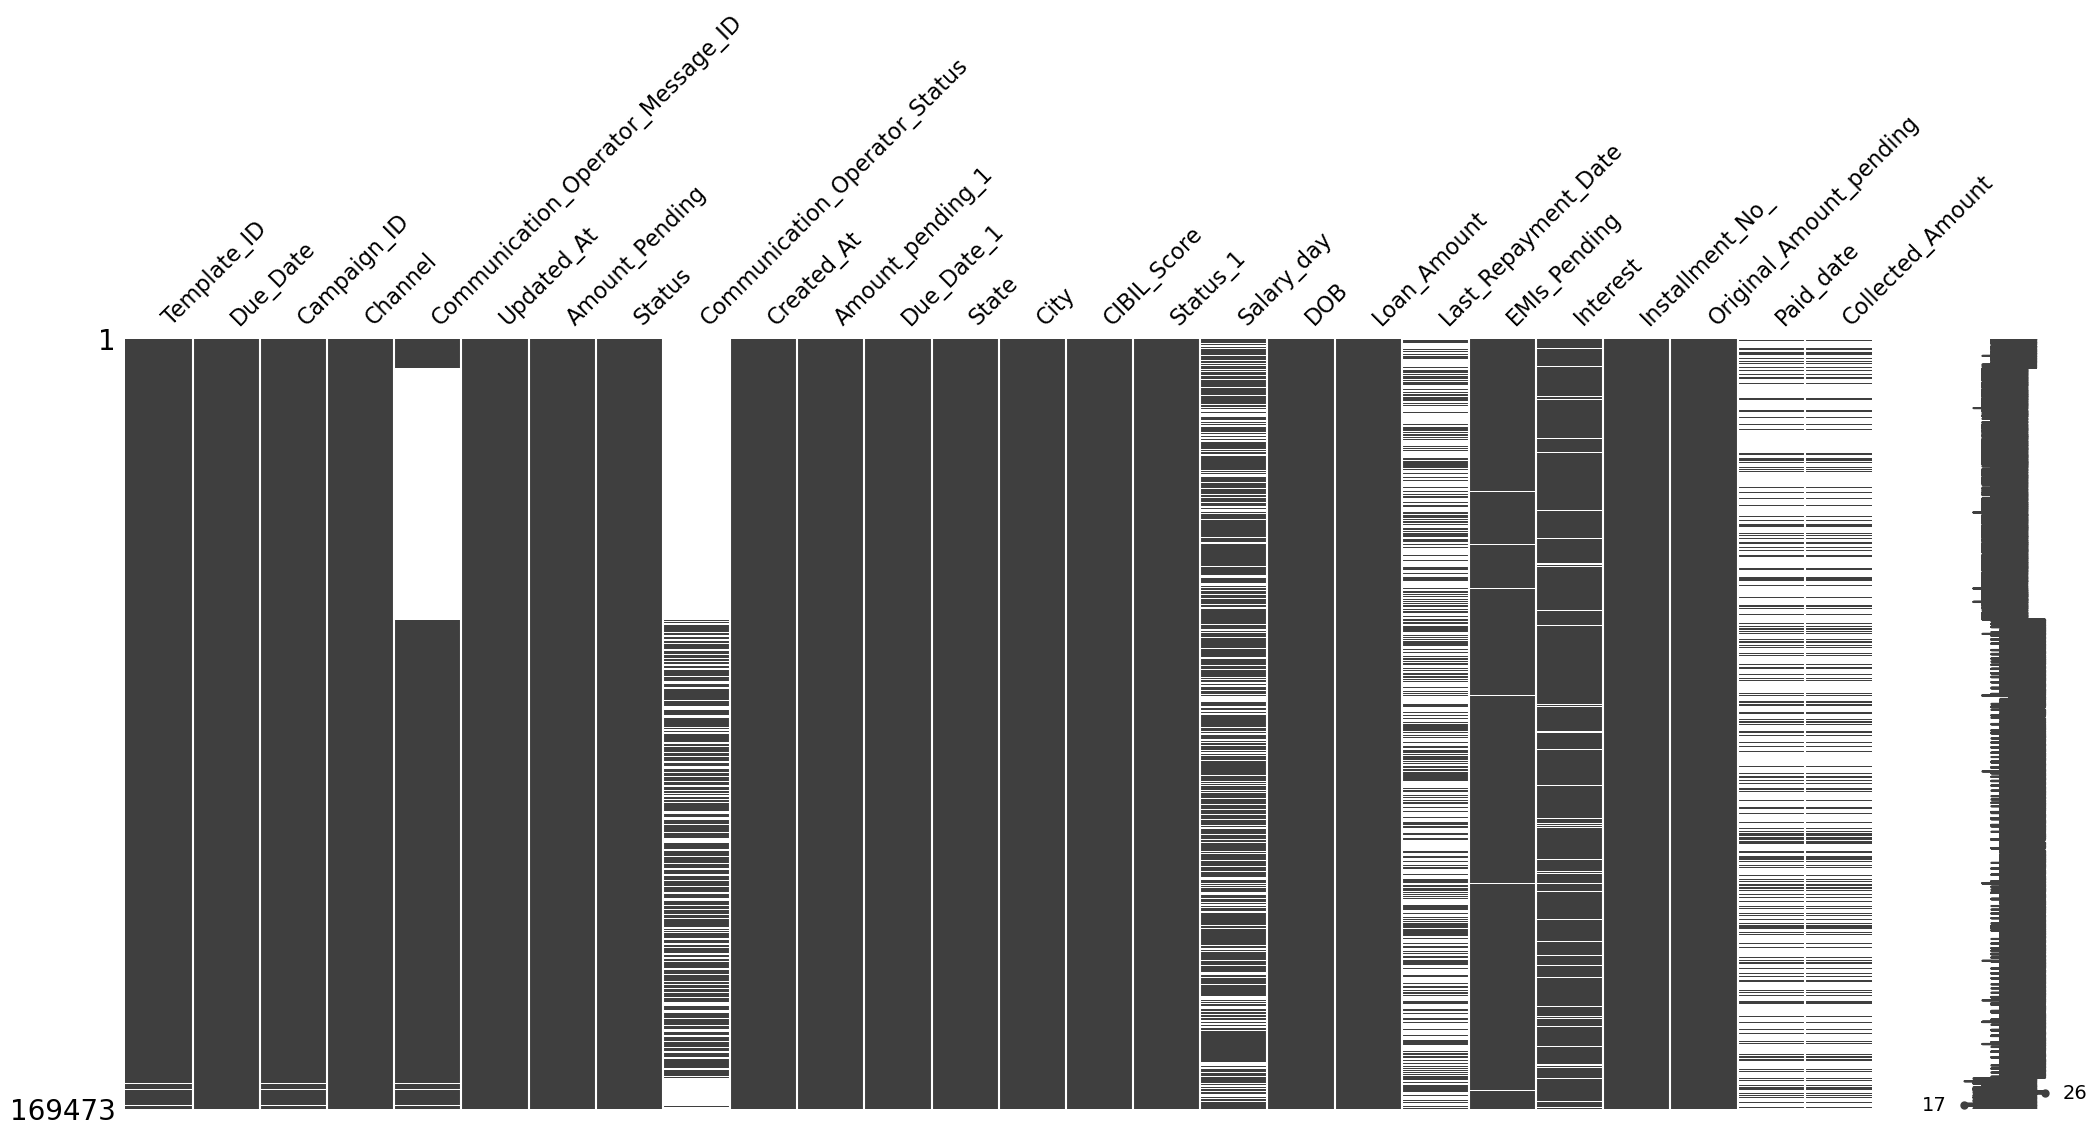

<Figure size 1500x900 with 0 Axes>

In [44]:
import missingno as msno
msno.matrix(portfolio)
plt.figure(figsize = (15,9))
plt.show()

In [45]:
conditions = [
    (portfolio['CIBIL_Score'] < 300) & (portfolio['CIBIL_Score'] < 550),
    (portfolio['CIBIL_Score'] >= 550) & (portfolio['CIBIL_Score'] < 650),
    (portfolio['CIBIL_Score'] >= 650) & (portfolio['CIBIL_Score'] < 750),
    (portfolio['CIBIL_Score'] >= 750) & (portfolio['CIBIL_Score'] < 900)
]

values = ['poor', 'average', 'good', 'excellent']

portfolio['CIBILStatus'] = np.select(conditions, values)

### Segmenting CIBIL score into good, average, excellent and poor

In [46]:
portfolio.head()

Template_ID                 Due_Date  Campaign_ID   Channel  \
0   Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
1   Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
2   Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
3   Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
4   Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   

  Communication_Operator_Message_ID                   Updated_At  \
0         4785461239170387979-NnUFJ  2022-12-02 14:49:25.123 UTC   
1         4785462264095129611-NmkbX    2022-12-02 12:37:56.3 UTC   
2         4785462271627915557-w4o5s    2022-12-02 12:48:33.3 UTC   
3         4785462273777979461-nzuZu  2022-12-02 12:15:11.356 UTC   
4         4785462294871265547-fCoFg  2022-12-02 12:19:06.166 UTC   

   Amount_Pending Status Communication_Operator_Status  \
0          6680.0   READ                           NaN   
1          7824.0   READ                           NaN   
2          7626.0   READ                           NaN   
3          6482.0   READ                           NaN   
4          5952.0   READ                           NaN   

                    Created_At  ...               DOB Loan_Amount  \
0  2022-12-02 12:11:02.221 UTC  ...  29-03-1989 00:00     50000.0   
1  2022-12-02 12:13:04.375 UTC  ...  10-04-1997 00:00     42000.0   
2  2022-12-02 12:13:05.267 UTC  ...  23-06-1988 00:00     40000.0   
3  2022-12-02 12:13:05.528 UTC  ...  03-05-1996 00:00     34000.0   
4  2022-12-02 12:13:08.026 UTC  ...  07-09-1984 00:00     32000.0   

  Last_Repayment_Date EMIs_Pending  Interest Installment_No_  \
0          2022-11-30          NaN   1124.44               9   
1          2022-11-18          6.0   1008.00               6   
2          2022-11-23          6.0    959.33               6   
3          2022-11-01          6.0    815.33               6   
4          2022-11-19          6.0    767.67               6   

   Original_Amount_pending   Paid_date  Collected_Amount CIBILStatus  
0                   6680.0         NaN               NaN        good  
1                   7824.0  2022-12-22            8207.0        good  
2                   7626.0  2022-12-25            8140.0        good  
3                   6482.0  2022-12-23            6482.0        good  
4                   5952.0  2022-12-15            5952.0        good  

[5 rows x 27 columns]

In [47]:
portfolio.fillna(0)

Template_ID                 Due_Date  Campaign_ID   Channel  \
0           Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
1           Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
2           Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
3           Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
4           Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
...               ...                      ...          ...       ...   
169468  Bounced Cases  2022-11-13 00:00:00 UTC  172503474.0       SMS   
169469  Bounced Cases  2022-11-13 00:00:00 UTC  172503474.0       SMS   
169470  Bounced Cases  2022-11-13 00:00:00 UTC  172503474.0       SMS   
169471  Bounced Cases  2022-11-13 00:00:00 UTC  172503474.0       SMS   
169472  Bounced Cases  2022-11-13 00:00:00 UTC  172503474.0       SMS   

       Communication_Operator_Message_ID                   Updated_At  \
0              4785461239170387979-NnUFJ  2022-12-02 14:49:25.123 UTC   
1              4785462264095129611-NmkbX    2022-12-02 12:37:56.3 UTC   
2              4785462271627915557-w4o5s    2022-12-02 12:48:33.3 UTC   
3              4785462273777979461-nzuZu  2022-12-02 12:15:11.356 UTC   
4              4785462294871265547-fCoFg  2022-12-02 12:19:06.166 UTC   
...                                  ...                          ...   
169468          326c676a4262393130383037  2022-12-07 04:58:10.796 UTC   
169469          326c676a4262313733353537  2022-12-07 04:58:09.944 UTC   
169470          326c676a4264333339303737  2022-12-07 04:58:11.083 UTC   
169471          326c676a4264303231303031  2022-12-07 04:58:25.116 UTC   
169472          326c676a4b65383437333036  2022-12-07 05:13:12.585 UTC   

        Amount_Pending               Status Communication_Operator_Status  \
0               6680.0                 READ                             0   
1               7824.0                 READ                             0   
2               7626.0                 READ                             0   
3               6482.0                 READ                             0   
4               5952.0                 READ                             0   
...                ...                  ...                           ...   
169468          3437.0  OPENED_PAYMENT_LINK                             0   
169469          1791.0  OPENED_PAYMENT_LINK                             0   
169470          1791.0  OPENED_PAYMENT_LINK                             0   
169471          1791.0  OPENED_PAYMENT_LINK                             0   
169472          1353.0  OPENED_PAYMENT_LINK                             0   

                         Created_At  ...               DOB Loan_Amount  \
0       2022-12-02 12:11:02.221 UTC  ...  29-03-1989 00:00     50000.0   
1       2022-12-02 12:13:04.375 UTC  ...  10-04-1997 00:00     42000.0   
2       2022-12-02 12:13:05.267 UTC  ...  23-06-1988 00:00     40000.0   
3       2022-12-02 12:13:05.528 UTC  ...  03-05-1996 00:00     34000.0   
4       2022-12-02 12:13:08.026 UTC  ...  07-09-1984 00:00     32000.0   
...                             ...  ...               ...         ...   
169468  2022-12-07 04:58:02.556 UTC  ...  10-06-1993 00:00     10000.0   
169469  2022-12-07 04:58:02.768 UTC  ...  02-12-2001 00:00      5000.0   
169470  2022-12-07 04:58:04.049 UTC  ...  07-06-1998 00:00      5000.0   
169471   2022-12-07 04:58:04.84 UTC  ...  04-04-1997 00:00      5000.0   
169472  2022-12-07 05:07:05.043 UTC  ...  04-03-2003 00:00      4059.0   

       Last_Repayment_Date EMIs_Pending  Interest Installment_No_  \
0               2022-11-30          0.0   1124.44               9   
1               2022-11-18          6.0   1008.00               6   
2               2022-11-23          6.0    959.33               6   
3               2022-11-01          6.0    815.33               6   
4               2022-11-19          6.0    767.67               6   
...                    ...  

### Segmenting borrowers based on the range of loan

In [48]:
portfolio['LoanScale'] = np.where(portfolio['Loan_Amount']>100000, 'Above 1 lakh', 'Below 1 lakh')

In [49]:
portfolio.head()

Template_ID                 Due_Date  Campaign_ID   Channel  \
0   Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
1   Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
2   Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
3   Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   
4   Chatbot 1  2022-11-24 00:00:00 UTC  164918275.0  WhatsApp   

  Communication_Operator_Message_ID                   Updated_At  \
0         4785461239170387979-NnUFJ  2022-12-02 14:49:25.123 UTC   
1         4785462264095129611-NmkbX    2022-12-02 12:37:56.3 UTC   
2         4785462271627915557-w4o5s    2022-12-02 12:48:33.3 UTC   
3         4785462273777979461-nzuZu  2022-12-02 12:15:11.356 UTC   
4         4785462294871265547-fCoFg  2022-12-02 12:19:06.166 UTC   

   Amount_Pending Status Communication_Operator_Status  \
0          6680.0   READ                           NaN   
1          7824.0   READ                           NaN   
2          7626.0   READ                           NaN   
3          6482.0   READ                           NaN   
4          5952.0   READ                           NaN   

                    Created_At  ...  Loan_Amount Last_Repayment_Date  \
0  2022-12-02 12:11:02.221 UTC  ...      50000.0          2022-11-30   
1  2022-12-02 12:13:04.375 UTC  ...      42000.0          2022-11-18   
2  2022-12-02 12:13:05.267 UTC  ...      40000.0          2022-11-23   
3  2022-12-02 12:13:05.528 UTC  ...      34000.0          2022-11-01   
4  2022-12-02 12:13:08.026 UTC  ...      32000.0          2022-11-19   

  EMIs_Pending Interest  Installment_No_ Original_Amount_pending   Paid_date  \
0          NaN  1124.44                9                  6680.0         NaN   
1          6.0  1008.00                6                  7824.0  2022-12-22   
2          6.0   959.33                6                  7626.0  2022-12-25   
3          6.0   815.33                6                  6482.0  2022-12-23   
4          6.0   767.67                6                  5952.0  2022-12-15   

  Collected_Amount  CIBILStatus     LoanScale  
0              NaN         good  Below 1 lakh  
1           8207.0         good  Below 1 lakh  
2           8140.0         good  Below 1 lakh  
3           6482.0         good  Below 1 lakh  
4           5952.0         good  Below 1 lakh  

[5 rows x 28 columns]

## MACRO & MICRO Level Analysis

In [50]:
import plotly.offline as py
#First plot
trace0 = go.Bar(
    x = portfolio.State.value_counts().index.values,
    y = portfolio.State.value_counts().values,
    marker=dict(
        color=portfolio.State.value_counts().values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='State'
    ),
    title='State-Wise Borrower Count'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='State-count')

Maharashtra accounts for most number of borrowers while Karnataka and Tamil Nadue secure the second and third postion.

In [51]:
import plotly.express as px

fig = px.histogram(portfolio, x="Status", y=None, color="LoanScale",
                width=600,height=350,
                histnorm='percent',
                color_discrete_map={ 
                    "male": "PansyPurple", "female": "lightsalmon"
                },
                template="plotly"
                )
fig.update_layout(title="Amount Wise Recollection through Channels", 
                  font_family="San Serif",
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 24},
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",)                 
                  )
fig.show()

Key Insights:
   - In the 'Read' section, it is clearly evident that borrowers who are taking loan below 1 lakh do not care to take action for payment
   - Borrowers who take loan above a lakh clearly want to repay their loan on time.

In [52]:
data = [go.Bar(
            x = portfolio["CIBILStatus"].value_counts().index.values,
            y = portfolio["CIBILStatus"].value_counts().values,
    )]

layout = go.Layout(
    title='CIBIL status variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

 - Over 120K borrowers have good credit score.
 - Over 30K borrowers have average credit score.
 - Over 14K borrowers have poor credit score.
 - Over 2K borrowers have excellent credit score.

In [53]:
title_mask = portfolio.State
cm = sns.light_palette("green", as_cmap=True)

round(pd.crosstab(portfolio[portfolio['State'].isin(title_mask)]['State'], 
                  portfolio[portfolio['State'].isin(title_mask)]['CIBILStatus'], 
                  normalize='index') * 100,2).style.background_gradient(cmap = cm)

There are many aspects of interesting incidences in this correlation graph
 - Almost all states have borrowers with 'good' score  DADRA & NAGAR HAVELI. In fact, DADRA & NAGAR HAVELI	is the only state to have both 'poor' and 'excellent' borrowers.
 - After DADRA & NAGAR HAVELI, SIKKIM is the second most state with 'poor' borrowers.
 - Arunachal Pradesh, Chattisgarh, Haryana, Madhya Pradesh, Mizoram and Pondicherry have 100% incidence in 'good' category of CIBIL Score.
 - Tripura, Nagaland, Andaman, Daman & Diu, Goa and West Bengal have lower risk i.e., 'poor' CIBIL status is quite low (from 0 - 4).
 - UTTAR PRADESH, UTTARAKHAND, Odisha, Meghalaya, Karnataka, Jharkhand and Chandigarh have high risk i.e., 'poor' CIBIL status is in the range (from 10 -50 )

In [54]:
data = [go.Bar(
            x = portfolio["Status"].value_counts().index.values,
            y = portfolio["Status"].value_counts().values,
    )]

layout = go.Layout(
    title='Loan status variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

 - Considering the count gap between DELIVERED and SENT, over 45K borrowers put their phone offline.
 - Only 6K borrowers care to read and repay.

In [55]:
cm = sns.light_palette("green", as_cmap=True)

round((pd.crosstab(portfolio['Status'], portfolio['EMIs_Pending'],
            values=portfolio['Loan_Amount'], aggfunc='mean')).fillna(0),
      2).style.background_gradient(cmap = cm)

 - There is equal incidence in the last installments, borrowers are quite relaxed and take time to pay the last two EMIs.
 - If 3/6/9 EMIs are pending, borrowers are taking the effort in paying the EMIs quickly. There is only a marginal deviation in the correlation factor
 - If 12 EMIs are pending (could also be the first EMI), borrowers are quite slow in repaying.

In [56]:
cm = sns.light_palette("green", as_cmap=True)

round((pd.crosstab(portfolio['Status'], portfolio['CIBILStatus'],
            values=portfolio['Amount_Pending'], aggfunc='mean')).fillna(0),
      2).style.background_gradient(cmap = cm)

 - 'average', 'good' and 'excellent' scorers take payment seriously i.e., high incidence.
 - 'poor' scorers are delaying payment. It is evident from medium incidence in the delivered cell.

In [57]:
t = portfolio['Status'].value_counts()
labels = t.index
values = t.values

colors = ['#006400', '#32CD32', '#7CFC00', '#98FB98']

trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Borrower Engagement Status', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 - On interesting fact is that a marginal range of people quickly engage in payment. There is a marginal difference between READ and OPENED_PAYMENT_LINK.

In [58]:
t = portfolio['Communication_Operator_Status'].value_counts()
labels = t.index
values = t.values

colors = ['#006400', '#32CD32', '#7CFC00', '#98FB98']

trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Communication Operator Status', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 - More than 60K calls have been completed
 - Only 10% requested for callback

In [59]:
t = portfolio['Channel'].value_counts()
labels = t.index
values = t.values

colors = ['#006400', '#32CD32', '#7CFC00', '#98FB98']

trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Mode of Communication', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 - Digital penetration is quite less, only 8% are communicated through whatsapp. If we increase Whatsapp communication, the repayment rate could go high

# Key Findings

 - IVR channel is used 70% of the time to contact a borrower.
 - Over 70% repayment is pending
 - Most of the borrowers are 24 years of age
 - Only 28% get their salary on month end
 - Bangalore East accounts for most of the borrowers